In [208]:
import os

import pandas as pd
import matplotlib as plt
import numpy as np
from scipy.stats import norm

In [209]:
import csv
from config import Config
from simulation import simulation


def make_csv(filepath='../analysis/test.csv', simulation_runs=100):
    headers = ['successfully_sent', 'repeated_packets', 'undetected_errors']
    with open(filepath, 'w+', encoding='UTF-8', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(headers)
        for i in range(simulation_runs):
            results = simulation(Config.DATA_LENGTH,
                                 Config.PACKET_LENGTH,
                                 Config.ERROR_DETECTING_METHOD.get("LongitudinalRedundancyCheck"),
                                 Config.ERROR_PROBABILITY,
                                 Config.CHANNEL_TYPE.get("BinarySymmetricChannel"))
            row = [results.get('PacketSuccessfullySent'), results.get('RepeatedPackets'),
                   results.get('UndetectedErrors')]
            writer.writerow(row)

In [210]:
filepath = '../analysis/example.csv'
simulation_runs = 100
err_probability = Config.ERROR_PROBABILITY
channel = 'binary symmetric channel'
detecting_method = 'longitudinal redundancy check'

make_csv(filepath, simulation_runs)
data = pd.read_csv(filepath_or_buffer=filepath, usecols=['successfully_sent', 'repeated_packets', 'undetected_errors'])

sr_filename = 'simulation_results.png'
hist_filename = 'sample_hist.png'
ss_filename = 'successfully_sent.png'
rp_filename = 'repeated_packets.png'
ue_filename = 'undetected_errors.png'

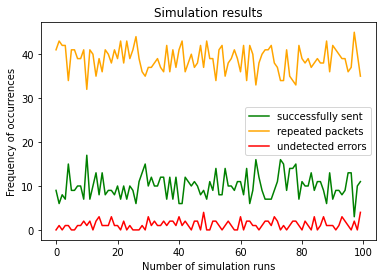

In [211]:
'''Simulation results configuration:
   * channel = binary symmetric channel,
   * errors detecting method = longitudinal redundancy check,
   * error probability = 0.05
'''
plt.pyplot.plot(data['successfully_sent'], '-g')
plt.pyplot.plot(data['repeated_packets'], color='orange')
plt.pyplot.plot(data['undetected_errors'], '-r')
plt.pyplot.legend(['successfully sent', 'repeated packets', 'undetected errors'])
plt.pyplot.xlabel('Number of simulation runs')
plt.pyplot.ylabel('Number of occurrences')
plt.pyplot.title(label='Simulation results')

plt.pyplot.savefig(os.path.join(os.getcwd(), sr_filename))

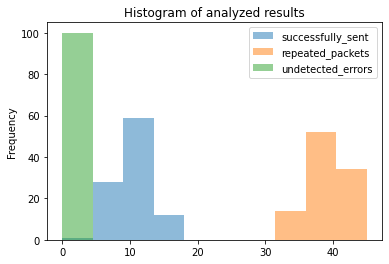

In [223]:
plot = data.plot.hist(alpha=0.5, title='Histogram of analyzed results')
fig = plot.get_figure()
fig.savefig(os.path.join(os.getcwd(), hist_filename))

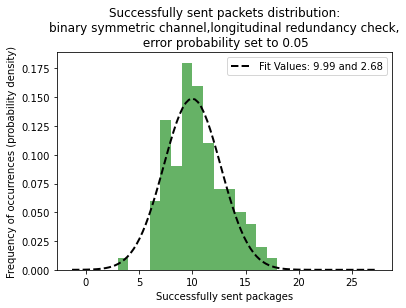

In [224]:
ss_min = data['successfully_sent'].min()
ss_max = data['successfully_sent'].max()
ss_mean, ss_std_dev = norm.fit(data['successfully_sent'])

# plot hist
plt.pyplot.hist(data['successfully_sent'], bins=range(ss_min-round(ss_mean) if ss_min-round(ss_mean) >= 0 else 0, ss_max+round(ss_mean)), color='green', alpha=0.6, density=True)
# plot pdf
xmin, xmax = plt.pyplot.xlim()
x = np.linspace(xmin, xmax, simulation_runs)
p = norm.pdf(x, ss_mean, ss_std_dev)
plt.pyplot.plot(x, p, '--k', linewidth=2)

label = "Fit Values: {:.2f} and {:.2f}".format(ss_mean, ss_std_dev)
plt.pyplot.xlabel('Successfully sent packages')
plt.pyplot.ylabel('Frequency of occurrences (probability density)')
plt.pyplot.title(f'Successfully sent packets distribution:\n{channel},{detecting_method},\n error probability set to {err_probability}')
plt.pyplot.legend([label])

plt.pyplot.savefig(os.path.join(os.getcwd(), ss_filename))

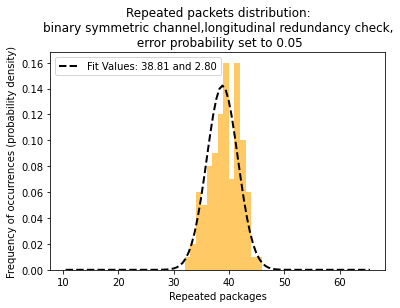

In [225]:
rp_min = data['repeated_packets'].min()
rp_max = data['repeated_packets'].max()
rp_mean, rp_std_dev = norm.fit(data['repeated_packets'])

# plot hist
plt.pyplot.hist(data['repeated_packets'], bins=range(rp_min-round(rp_mean/2) if rp_min-round(rp_mean/2) >= 0 else 0, rp_max+round(rp_mean/2)), color='orange', alpha=0.6, density=True)
# plot pdf
xmin, xmax = plt.pyplot.xlim()
x = np.linspace(xmin, xmax, simulation_runs)
rp_p = norm.pdf(x, rp_mean, rp_std_dev)
plt.pyplot.plot(x, rp_p, '--k', linewidth=2)

label = "Fit Values: {:.2f} and {:.2f}".format(rp_mean, rp_std_dev)
plt.pyplot.xlabel('Repeated packages')
plt.pyplot.ylabel('Frequency of occurrences (probability density)')
plt.pyplot.title(f'Repeated packets distribution:\n{channel},{detecting_method},\n error probability set to {err_probability}')
plt.pyplot.legend([label])

plt.pyplot.savefig(os.path.join(os.getcwd(), rp_filename))

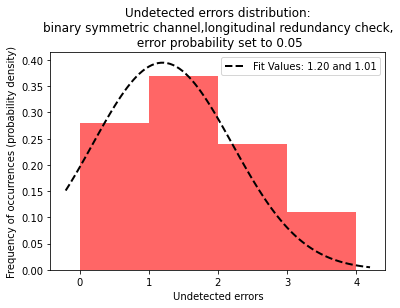

In [226]:
ue_min = data['undetected_errors'].min()
ue_max = data['undetected_errors'].max()
ue_mean, ue_std_dev = norm.fit(data['undetected_errors'])

# plot hist
plt.pyplot.hist(data['undetected_errors'], bins=range(ue_min-round(ue_mean) if ue_min-round(ue_mean) >= 0 else 0, ue_max+round(ue_mean)), color='red', alpha=0.6, density=True)
# plot pdf
xmin, xmax = plt.pyplot.xlim()
x = np.linspace(xmin, xmax, simulation_runs)
ue_p = norm.pdf(x, ue_mean, ue_std_dev)
plt.pyplot.plot(x, ue_p, '--k', linewidth=2)

label = "Fit Values: {:.2f} and {:.2f}".format(ue_mean, ue_std_dev)
plt.pyplot.xlabel('Undetected errors')
plt.pyplot.ylabel('Frequency of occurrences (probability density)')
plt.pyplot.title(f'Undetected errors distribution:\n{channel},{detecting_method},\n error probability set to {err_probability}')
plt.pyplot.legend([label])

plt.pyplot.savefig(os.path.join(os.getcwd(), ue_filename))